In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline

plot saved


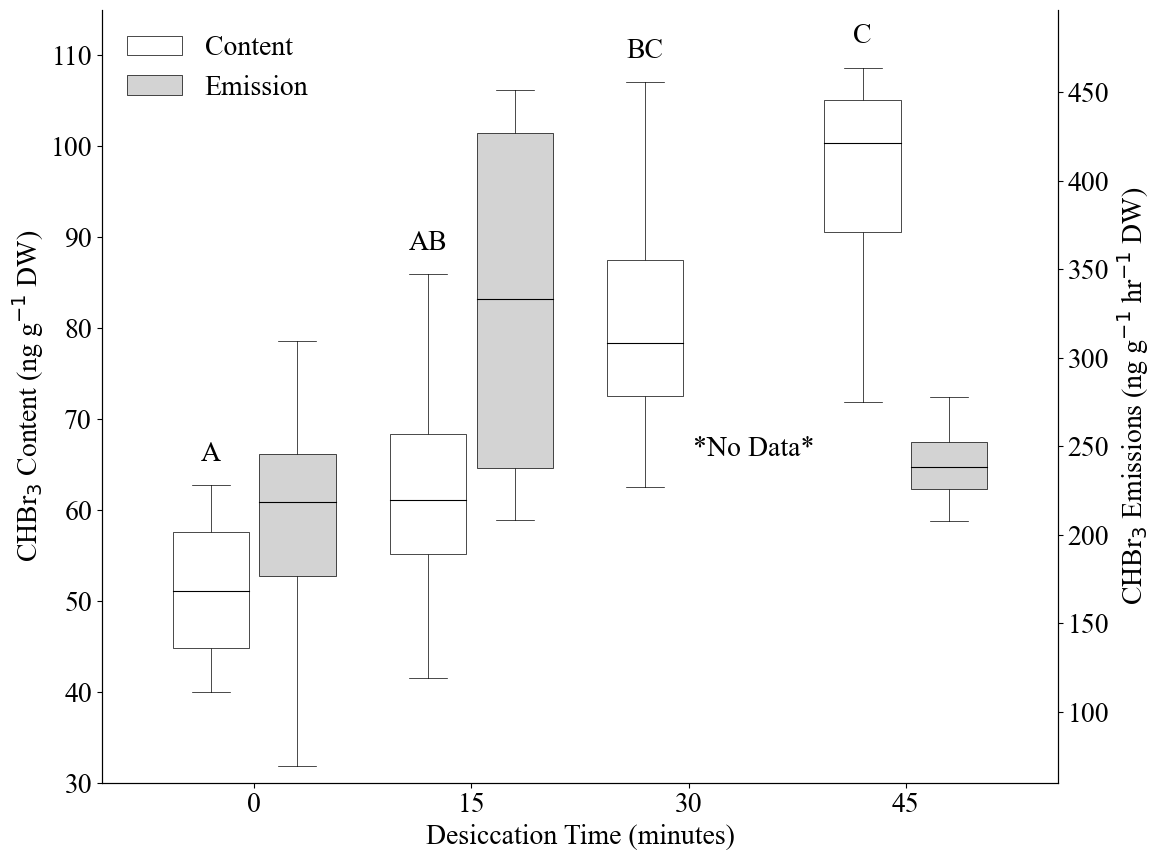

Emission Data Statistics (ng g^-1 hr^-1 DW):
Desiccation Time: 0.0 minutes - Mean: 203.90, SD: 99.43
Desiccation Time: 1.0 minutes - Mean: 331.40, SD: 121.51
Desiccation Time: 2.0 minutes - Mean: nan, SD: nan
Desiccation Time: 3.0 minutes - Mean: 240.54, SD: 29.09


In [120]:
# Load the data
file_path = r'G:\My Drive\aquaculture\burps\publication\desiccation\desiccation bromo data - blocked.csv'
image_path = r'G:\My Drive\aquaculture\burps\publication\desiccation\desiccation_plot.tiff'
data = pd.read_csv(file_path)

# Set up the matplotlib figure
plt.figure(figsize=(12, 9), edgecolor='none')
# Set Times New Roman font globally in Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Define treatments
treatments = data['Treatment'].unique()
n_treatments = len(treatments)

# Create positions for the box plots
positions_bromo = range(n_treatments)  # x positions for Bromoform_cont (now on primary axis)
positions_emission = [x + 0.4 for x in positions_bromo]  # x positions for emission_dw (now on secondary axis)
custom_labels = ['0', '15', '30', '45']

# Create the first box plot for 'Bromoform_cont' on primary y-axis (left)
plt.boxplot(
    [data[data['Treatment'] == t]['Bromoform_cont'] for t in treatments],
    positions=positions_bromo,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='white', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black')
)
plt.gca().set_ylim(30, 115)
plt.gca().spines['top'].set_visible(False)
plt.ylabel('CHBr$_{3}$ Content (ng g$^{-1}$ DW)', fontsize=20)
plt.xlabel('Desiccation Time (minutes)', fontsize=20)

# Add posthoc letters above the Bromoform box plots (on primary axis)
posthoc_labels_bromo = ['A', 'AB', 'BC', 'C']
for i, label in enumerate(posthoc_labels_bromo):
    whisker_max = data[data['Treatment'] == treatments[i]]['Bromoform_cont'].max()
    plt.text(positions_bromo[i], whisker_max + 2, label, ha='center', va='bottom', fontsize=20, color='black')  # Font size 20

# Create the second y-axis for 'emission_dw' (right y-axis)
ax2 = plt.gca().twinx()
ax2.set_ylabel('CHBr$_{3}$ Emissions (ng g$^{-1}$ hr$^{-1}$ DW)', fontsize=20)  # Font size 20

# Create the second box plot for 'emission_dw' on the secondary y-axis (right)
ax2.boxplot(
    [data[data['Treatment'] == t]['emission_dw'] for t in treatments],
    positions=positions_emission,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='lightgray', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black'),
    whis=[0, 100]  # Extend whiskers to include the entire range (min and max)
)

# Adjust y-limits for the second y-axis dynamically based on emission_dw
emission_max = data['emission_dw'].max()
emission_min = data['emission_dw'].min()
plt.gca().set_ylim(emission_min, emission_max * 1.1)

# Add "No Data" text on the secondary y-axis (ax2)
y_min, y_max = ax2.get_ylim()
text_y_position = y_max * 0.5  # Move the text higher above the plot area
ax2.text(2.5, text_y_position, '*No Data*', ha='center', va='center', fontsize=20, color='black', zorder=6)  # Font size 20

# Add legend without a box and set font size to 20
bromo_patch = plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', linewidth=0.5)
emission_patch = plt.Rectangle((0, 0), 1, 1, facecolor='lightgray', edgecolor='black', linewidth=0.5)
plt.legend([bromo_patch, emission_patch], ['Content', 'Emission'], loc='upper left', frameon=False, fontsize=20)  # Font size 20

# Remove the top outline of the figure
plt.gca().patch.set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_ylim(60)

# Center the x-tick labels between the box plots and set font size to 20
mid_positions = [(x + (x + 0.4)) / 2 for x in positions_bromo]
plt.xticks(mid_positions, custom_labels, fontsize=20)

# Save the figure with specified dpi
plt.tight_layout()
try:
    plt.savefig(image_path, dpi=1200, bbox_inches='tight', pad_inches=0.1)
    print('plot saved')
except:
    print('error making plot')

# Show the plots
plt.show()

# Calculate means and standard deviations
emission_stats = data.groupby('Treatment')['emission_dw'].agg(['mean', 'std']).reset_index()

# Print the statistics
print("Emission Data Statistics (ng g^-1 hr^-1 DW):")
for index, row in emission_stats.iterrows():
    treatment = row['Treatment']
    mean_val = row['mean']
    std_val = row['std']
    print(f"Desiccation Time: {treatment} minutes - Mean: {mean_val:.2f}, SD: {std_val:.2f}")



         date  treatment  bromo_cont  bromo_emission   growth %  growth%/day  \
0   7/26/2022          1  152.214833       23.676667   9.293045     2.323261   
1   7/28/2022          1  120.567542       41.816667 -16.536620    -8.270000   
2    8/2/2022          1  125.877824       36.916667   8.522710     2.130000   
3      8/9/22          1  336.611857       27.326667  10.311232     2.060000   
4     8/11/22          1  122.034238       67.566667  -2.618162    -1.310000   
5        8/25          1   14.888847       52.703333 -10.111770    -5.060000   
6   7/26/2022          2  117.499065       23.305000   4.379671     1.094918   
7   7/28/2022          2  113.415117             NaN -12.197939    -6.100000   
8    8/2/2022          2  209.440773       44.510000  -7.980298    -2.000000   
9    8/9/2022          2  379.470000       44.690000  11.170898     2.230000   
10  8/11/2022          2   54.220000             NaN -13.195332    -6.600000   
11  8/25/2022          2   15.180000    

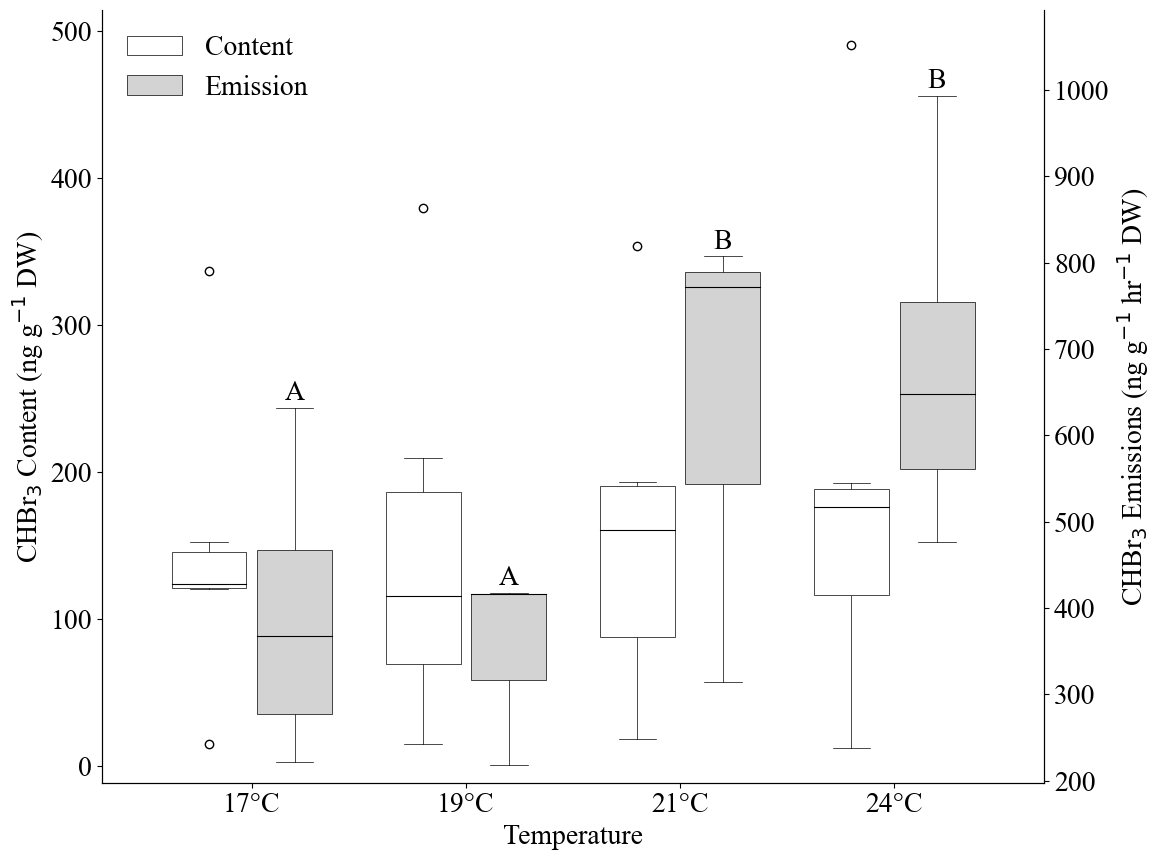

Mean and Standard Deviation for CHBr3 Emissions (ng g^-1 hr^-1 DW):
Treatment 1: Mean = 389.42, SD = 153.25
Treatment 2: Mean = 350.48, SD = 114.91
Treatment 3: Mean = 631.21, SD = 274.63
Treatment 4: Mean = 681.41, SD = 185.41


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'G:\My Drive\aquaculture\burps\publication\Thermal\Thermal bromo exp - blocked (1).csv'
image_path = r'G:\My Drive\aquaculture\burps\publication\Thermal\temperature_plot.tiff'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()
data['emissions_dw'] = data['emissions_dw'].replace(0, np.nan)
data_bromo = data[['treatment', 'bromo_cont']].dropna(subset=['bromo_cont'])
data_emission = data[['treatment', 'emissions_dw']].dropna(subset=['emissions_dw'])
print(data)

# Set up the matplotlib figure
fig, ax_main = plt.subplots(figsize=(12, 9))

# Set Times New Roman font globally in Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # Set default font size for global elements

# Define treatments
treatments = data['treatment'].unique()
n_treatments = len(treatments)

# Create positions for the box plots
positions_bromo = range(n_treatments)  # x positions for Bromoform_cont (now on primary axis)
positions_emission = [x + 0.4 for x in positions_bromo]  # x positions for emission_dw (now on secondary axis)
custom_labels = ['17\u00B0C', '19\u00B0C', '21\u00B0C', '24\u00B0C']

# Create the first box plot for 'Bromoform_cont' on primary y-axis (left)
ax_main.boxplot(
    [data_bromo[data_bromo['treatment'] == t]['bromo_cont'] for t in treatments],
    positions=positions_bromo,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='white', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black')
)
plt.gca().spines['top'].set_visible(False)

# Apply font size to main y-axis label and ticks
ax_main.set_ylabel('CHBr$_{3}$ Content (ng g$^{-1}$ DW)', fontsize=20)
ax_main.tick_params(axis='y', labelsize=20)  # Set font size for y-axis tick labels

# Create the second y-axis for 'emission_dw' (right y-axis)
ax2 = ax_main.twinx()
ax2.set_ylabel('CHBr$_{3}$ Emissions (ng g$^{-1}$ hr$^{-1}$ DW)', fontsize=20)  # Set font size
ax2.tick_params(axis='y', labelsize=20)  # Set font size for right y-axis tick labels

# Create the second box plot for 'emission_dw' on the secondary y-axis (right)
ax2.boxplot(
    [data_emission[data_emission['treatment'] == t]['emissions_dw'] for t in treatments],
    positions=positions_emission,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='lightgray', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black')
)

# Add posthoc letters above the Emissions box plots (on secondary axis)
posthoc_labels_emission = ['A', 'A', 'B', 'B']  # Replace this with your actual labels
for i, label in enumerate(posthoc_labels_emission):
    whisker_max_emission = data_emission[data_emission['treatment'] == treatments[i]]['emissions_dw'].max()
    ax2.text(
        positions_emission[i],  # Position of the letter
        whisker_max_emission + 2,  # Height above the whisker
        label,  # The actual letter
        ha='center',  # Center the letter over the box
        va='bottom',  # Align vertically below the maximum whisker
        fontsize=20,  # Set font size to match other elements
        color='black'  # Set letter color to black
    )

# Adjust y-limits for the second y-axis dynamically based on emission_dw
emission_max = data['emissions_dw'].max()
emission_min = data['emissions_dw'].min()
ax2.set_ylim(emission_min-20, emission_max * 1.1)

# Add custom labels for the x-axis ticks and set font size
mid_positions = [(x + (x + 0.4)) / 2 for x in positions_bromo]
plt.xticks(mid_positions, custom_labels, fontsize=20)  # Set x-tick font size
ax_main.set_xlabel('Temperature', fontsize=20)  # Set x-axis label font size

# Add legend without a box
bromo_patch = plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', linewidth=0.5)
emission_patch = plt.Rectangle((0, 0), 1, 1, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax_main.legend([bromo_patch, emission_patch], ['Content', 'Emission'], loc='upper left', frameon=False, fontsize=20)  # Set legend font size

# Remove the top outline of the figure
plt.gca().spines['top'].set_visible(False)

# Save the figure with specified dpi
plt.tight_layout()
plt.savefig(image_path, dpi=1200, bbox_inches='tight', pad_inches=0.1)

# Show the plots
plt.show()


# Calculate and print mean and standard deviation for each treatment
print("Mean and Standard Deviation for CHBr3 Emissions (ng g^-1 hr^-1 DW):")
for treatment in treatments:
    treatment_data = data_emission[data_emission['treatment'] == treatment]['emissions_dw']
    mean_value = treatment_data.mean()
    std_value = treatment_data.std()
    print(f"Treatment {treatment}: Mean = {mean_value:.2f}, SD = {std_value:.2f}")


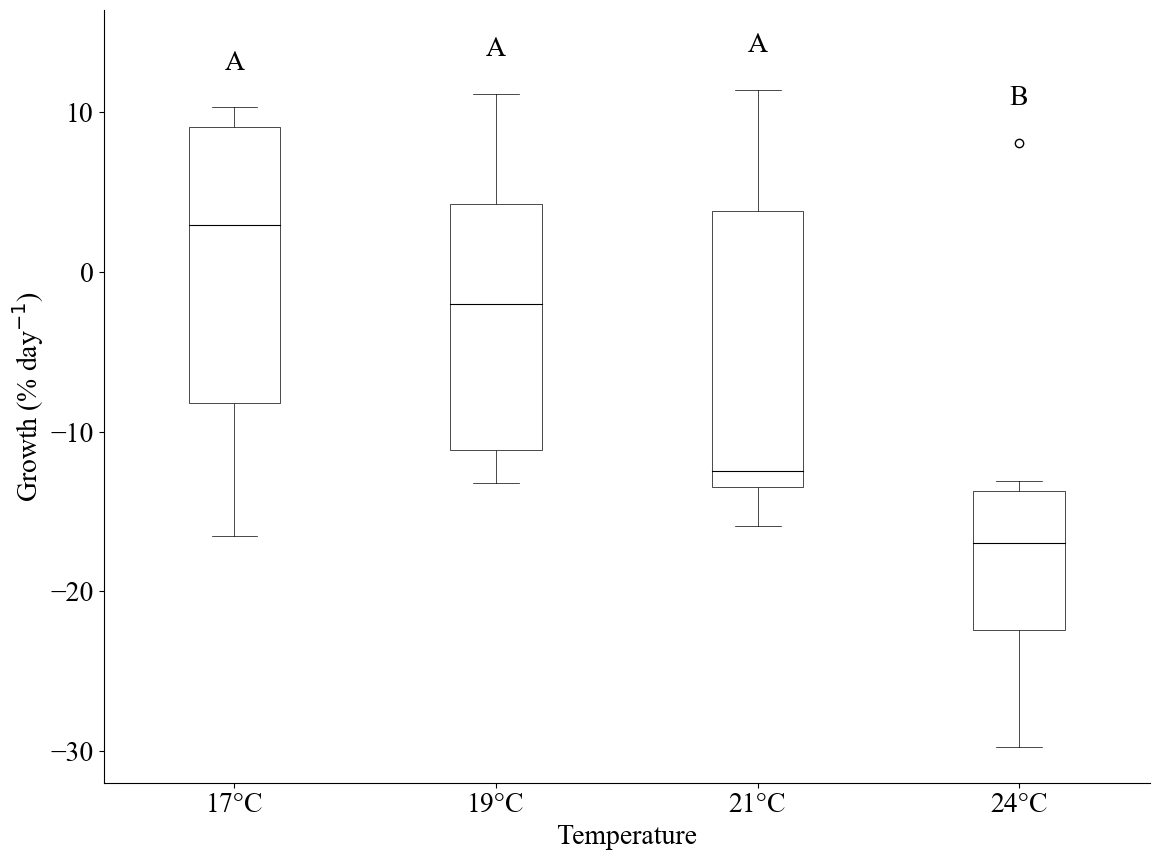

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'G:\My Drive\aquaculture\burps\publication\Thermal\Thermal bromo exp - blocked (1).csv'
image_path = r'G:\My Drive\aquaculture\burps\publication\Thermal\growth_plot.tiff'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip()

# Set up the matplotlib figure
fig, ax_main = plt.subplots(figsize=(12, 9))

# Set Times New Roman font globally in Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # Set default font size for global elements

# Define treatments
treatments = data['treatment'].unique()
n_treatments = len(treatments)

# Create positions for the box plots
positions_growth = range(n_treatments)  # x positions for Growth %

# Custom labels for the x-axis (temperature in degrees Celsius)
custom_labels = ['17\u00B0C', '19\u00B0C', '21\u00B0C', '24\u00B0C']

# Create the box plot for 'growth %'
ax_main.boxplot(
    [data[data['treatment'] == t]['growth %'] for t in treatments],
    positions=positions_growth,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='white', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black')
)

# Set the y-axis label and tick size
ax_main.set_ylabel('Growth (% day$^{-1}$)', fontsize=20)
ax_main.tick_params(axis='y', labelsize=20)  # Set font size for y-axis tick labels

# Calculate the maximum value for the 'growth %' column and set ylim
max_growth = data['growth %'].max()
ax_main.set_ylim(-32, max_growth + 5)

# Add custom labels for the x-axis ticks and set font size
mid_positions = [x for x in positions_growth]
plt.xticks(mid_positions, custom_labels, fontsize=20)  # Set x-tick font size
ax_main.set_xlabel('Temperature', fontsize=20)  # Set x-axis label font size

# Add post-hoc letters above the boxplots
posthoc_labels = ['A', 'A', 'A', 'B']  # Replace with your actual posthoc test results
for i, label in enumerate(posthoc_labels):
    # Get the maximum value for each growth box plot
    whisker_max = data[data['treatment'] == treatments[i]]['growth %'].max()
    
    # Add the text to the plot above the whiskers
    ax_main.text(
        positions_growth[i],  # Position of the letter
        whisker_max + 2,  # Adjust the vertical position slightly above the whisker
        label,  # The letter (A, B, etc.)
        ha='center',  # Center the text horizontally
        va='bottom',  # Align the text vertically at the bottom
        fontsize=20,  # Font size for the letters
        color='black'  # Color for the letters
    )

# Remove the top outline of the figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Save the figure with specified dpi
plt.tight_layout()
plt.savefig(image_path, dpi=1200, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


   Sample date  Treatment  Bromo_cont  Growth (%/day)  emission_dw
0    6/14/2023          0         NaN             NaN   257.943925
1    6/14/2023         30         NaN             NaN   187.102804
2    6/14/2023         60         NaN             NaN   165.467290
3     6/9/2022          0   96.203327             NaN   436.682243
4     6/9/2022         30   74.972953             NaN   259.626168
5     6/9/2022         60   62.984713             NaN   125.981308
6       6/7/22          0   96.624502       -0.309646   416.542056
7       6/7/22         30   85.594242        0.944124   218.691589
8       6/7/22         60   49.871043        1.055470   176.775701
9       6/2/22          0   48.503299        0.815836   621.869159
10      6/2/22         30   34.997276        0.419529    68.271028
11      6/2/22         60   36.411135        0.261579    71.822430
12     5/31/22          0   91.693809        0.839926   197.056075
13     5/31/22         30   53.102592        1.299912   136.63

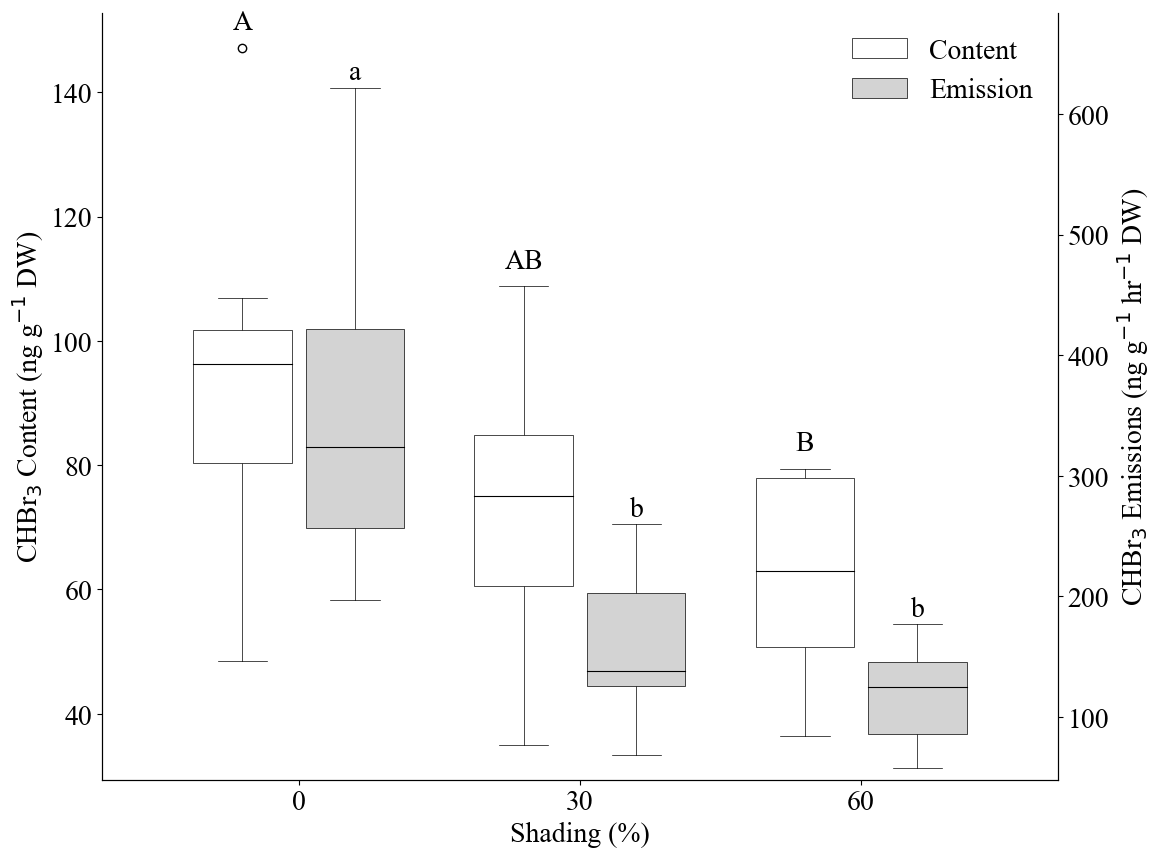

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = r'G:\My Drive\aquaculture\burps\publication\shade\bromo shade exp - Blocked.csv'
image_path = r'G:\My Drive\aquaculture\burps\publication\shade\shade_plot.tiff'
data = pd.read_csv(file_path)
print(data)
# Clean column names and replace zeros with NaN in the emissions data
data.columns = data.columns.str.strip()
data['emission_dw'] = data['emission_dw'].replace(0, np.nan)

# Filter data for Bromoform content and emissions
data_bromo = data[['Treatment', 'Bromo_cont']].dropna(subset=['Bromo_cont'])
data_emission = data[['Treatment', 'emission_dw']].dropna(subset=['emission_dw'])

# Set up the matplotlib figure
fig, ax_main = plt.subplots(figsize=(12, 9))

# Set Times New Roman font globally in Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # Set default font size for global elements

# Define treatments
treatments = data['Treatment'].unique()
n_treatments = len(treatments)

# Create positions for the box plots
positions_bromo = range(n_treatments)  # x positions for Bromoform_cont (now on primary axis)
positions_emission = [x + 0.4 for x in positions_bromo]  # x positions for emission_dw (now on secondary axis)

# Adjust custom labels to match the number of treatments
custom_labels = ['0', '30', '60']  # Only 3 labels to match 3 treatments

# Create the first box plot for 'Bromoform_cont' on primary y-axis (left)
ax_main.boxplot(
    [data_bromo[data_bromo['Treatment'] == t]['Bromo_cont'] for t in treatments],
    positions=positions_bromo,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='white', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black')
    #whis=[0, 100]  # Extend whiskers to include the entire range (min and max)
)

# Add posthoc letters above the Emissions box plots (on secondary axis)
posthoc_labels_emission = ['A', 'AB', 'B']  # Replace this with your actual labels
for i, label in enumerate(posthoc_labels_emission):
    whisker_max_cont = data_bromo[data_bromo['Treatment'] == treatments[i]]['Bromo_cont'].max()
    ax_main.text(
        positions_bromo[i],  # Position of the letter
        whisker_max_cont + 2,  # Height above the whisker
        label,  # The actual letter
        ha='center',  # Center the letter over the box
        va='bottom',  # Align vertically below the maximum whisker
        fontsize=20,  # Set font size to match other elements
        color='black'  # Set letter color to black
    )

plt.gca().spines['top'].set_visible(False)

# Apply font size to main y-axis label and ticks
ax_main.set_ylabel('CHBr$_{3}$ Content (ng g$^{-1}$ DW)', fontsize=20)
ax_main.tick_params(axis='y', labelsize=20)  # Set font size for y-axis tick labels

# Adjust y-limits for the second y-axis dynamically based on emission_dw
bromo_max = data['Bromo_cont'].max()
bromo_min = data['Bromo_cont'].min()
ax2.set_ylim(bromo_min-10, bromo_max * 1.2)

# Create the second y-axis for 'emission_dw' (right y-axis)
ax2 = ax_main.twinx()
ax2.set_ylabel('CHBr$_{3}$ Emissions (ng g$^{-1}$ hr$^{-1}$ DW)', fontsize=20)  # Set font size
ax2.tick_params(axis='y', labelsize=20)  # Set font size for right y-axis tick labels

# Create the second box plot for 'emission_dw' on the secondary y-axis (right)
ax2.boxplot(
    [data_emission[data_emission['Treatment'] == t]['emission_dw'] for t in treatments],
    positions=positions_emission,
    patch_artist=True,
    widths=0.35,
    boxprops=dict(facecolor='lightgray', edgecolor='black', linewidth=0.5),
    whiskerprops=dict(linewidth=0.5, color='black'),
    capprops=dict(linewidth=0.5, color='black'),
    medianprops=dict(linewidth=0.8, color='black')
    #whis=[0, 100]  # Extend whiskers to include the entire range (min and max)
)

# Add posthoc letters above the Emissions box plots (on secondary axis)
posthoc_labels_emission = ['a', 'b', 'b']  # Replace this with your actual labels
for i, label in enumerate(posthoc_labels_emission):
    whisker_max_emission = data_emission[data_emission['Treatment'] == treatments[i]]['emission_dw'].max()
    ax2.text(
        positions_emission[i],  # Position of the letter
        whisker_max_emission + 2,  # Height above the whisker
        label,  # The actual letter
        ha='center',  # Center the letter over the box
        va='bottom',  # Align vertically below the maximum whisker
        fontsize=20,  # Set font size to match other elements
        color='black'  # Set letter color to black
    )

# Adjust y-limits for the second y-axis dynamically based on emission_dw
emission_max = data['emission_dw'].max()
emission_min = data['emission_dw'].min()
ax2.set_ylim(emission_min-10, emission_max * 1.1)


# Add custom labels for the x-axis ticks and set font size
mid_positions = [(x + (x + 0.4)) / 2 for x in positions_bromo]
plt.xticks(mid_positions, custom_labels, fontsize=20)  # Set x-tick font size
ax_main.set_xlabel('Shading (%)', fontsize=20)  # Set x-axis label font size


# Add legend without a box
bromo_patch = plt.Rectangle((0, 0), 1, 1, facecolor='white', edgecolor='black', linewidth=0.5)
emission_patch = plt.Rectangle((0, 0), 1, 1, facecolor='lightgray', edgecolor='black', linewidth=0.5)
ax_main.legend([bromo_patch, emission_patch], ['Content', 'Emission'], loc='upper right', frameon=False, fontsize=20)  # Set legend font size

# Remove the top outline of the figure
plt.gca().spines['top'].set_visible(False)

# Save the figure with specified dpi
plt.tight_layout()
plt.savefig(image_path, dpi=1200, bbox_inches='tight', pad_inches=0.1)

# Show the plots
plt.show()


Statistics for emissions by PAR:
PAR: 39.86, Mean: 205.05, SD: 31.96 (n=3.0)
PAR: 57.69, Mean: 109.47, SD: 26.00 (n=3.0)
PAR: 575.00, Mean: 266.88, SD: 61.26 (n=3.0)
PAR: 848.00, Mean: 193.96, SD: 13.07 (n=3.0)
PAR: 1003.00, Mean: 254.58, SD: 57.45 (n=3.0)


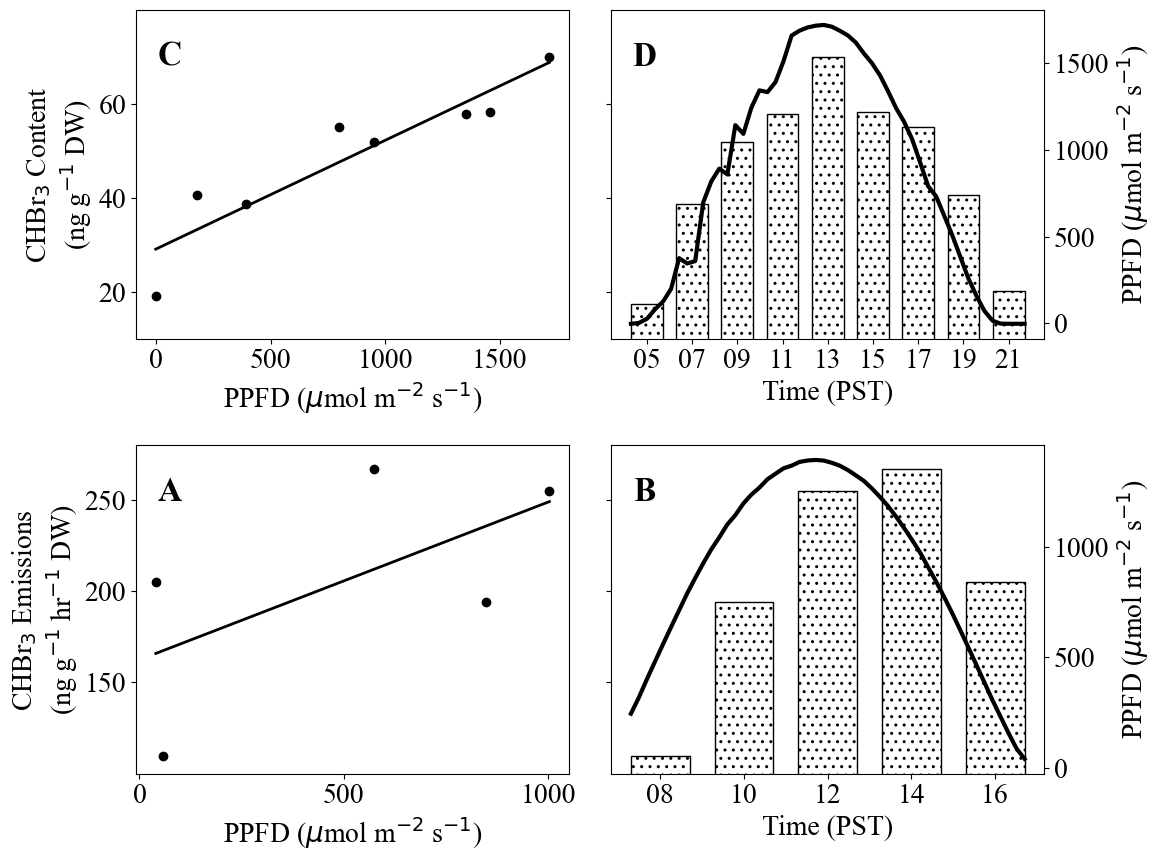

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline

# File paths
light_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\16hourlight.csv'
bromo_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\Bromo_16_hour - Data2.csv'
emission_par_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\PAR_Feb_23.csv'
emission_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\Gracilaria Dirunal Emissions Data (1).csv'
emission_reg_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\Bromo 16 hour -emission.csv'
cont_reg_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\Bromo 16 hour -content.csv'

image_path = r'G:\My Drive\aquaculture\burps\publication\all_day_bromo\figure.tiff'

# Data loading
light_df = pd.read_csv(light_path)
bromo_df = pd.read_csv(bromo_path)
emission_df = pd.read_csv(emission_path)
emission_par_df = pd.read_csv(emission_par_path).dropna()
emission_regress_df = pd.read_csv(emission_reg_path)
bromo_regress_df = pd.read_csv(cont_reg_path)

# Group by 'PAR' and calculate mean and SD
stats = emission_regress_df.groupby('PAR').agg(
    Mean=('ng/g_dw', 'mean'),
    SD=('ng/g_dw', 'std'),
    Count=('ng/g_dw', 'count')
).reset_index()

# Print the results
print("Statistics for emissions by PAR:")
for _, row in stats.iterrows():
    print(
        f"PAR: {row['PAR']:.2f}, "
        f"Mean: {row['Mean']:.2f}, "
        f"SD: {row['SD']:.2f} "
        f"(n={row['Count']})"
    )

# Data processing for content
x = light_df['unix_time']
y = light_df['sr_1']
model = make_interp_spline(x, y)
xs = np.linspace(x.min(), x.max(), 50)
ys = model(xs)

avg_df = bromo_df.groupby('Time')['ng/g seaweed'].mean().reset_index()
avg_df['Time'] = pd.to_datetime(avg_df['Time'])
avg_df['Hour'] = avg_df['Time'].dt.strftime('%H')
avg_df = avg_df.sort_values('Time')

bromo_regress_df = bromo_regress_df.groupby('PAR')['bromo(ng/g)'].mean().reset_index()
cont_par_array = np.array(bromo_regress_df['PAR'])
cont_bromo_array = np.array(bromo_regress_df['bromo(ng/g)'])

# Data processing for emissions
emission_regress_df = emission_regress_df.groupby('PAR')['ng/g_dw'].mean().reset_index()
emission_par_array = np.array(emission_regress_df['PAR'])
emission_bromo_array = np.array(emission_regress_df['ng/g_dw'])

# PAR curve
xe = emission_par_df['unix_time']
ye = emission_par_df['Weather_Station']
model_e = make_interp_spline(xe, ye)
xs_e = np.linspace(xe.min(), xe.max(), 50)
ys_e = model_e(xs_e)

# Bar data
avg_df_e = emission_df.groupby('Mid-point Time')['ng/g_dw'].mean().reset_index()
avg_df_e['Mid-point Time'] = pd.to_datetime(avg_df_e['Mid-point Time'])
avg_df_e['Hour'] = avg_df_e['Mid-point Time'].dt.strftime('%H')
avg_df_e = avg_df_e.sort_values('Hour')

# Set up the figure
fig = plt.figure(figsize=(12, 9))  # Same figure size
# Set Times New Roman font globally in Matplotlib
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20  # Set default font size for global elements

# Subplot 2
ax3 = fig.add_subplot(2, 2, 2)
ax3b = fig.add_subplot(2, 2, 2, frame_on=False)
ax3.bar(avg_df.Hour, avg_df['ng/g seaweed'], fill=False, hatch='..', width=0.7)
ax3b.plot(xs, ys, linewidth=3, color='black')
ax3b.xaxis.tick_top()
ax3b.yaxis.tick_right()
ax3b.axes.xaxis.set_visible(False)
ax3b.yaxis.set_label_position("right")
ax3.set_xlabel('Time (PST)')
ax3b.set_ylabel('PPFD ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax3b.set_yticks([0, 500, 1000, 1500])
ax3.set_ylabel('')  # Remove y-axis label
ax3.set_yticks([20, 40, 60])
ax3.set_yticklabels([])
ax3.set_ylim(10,80)
ax3.text(0.05, 0.9, 'D', transform=ax3.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')

# Subplot 4
ax1 = fig.add_subplot(2, 2, 4)
ax1b = fig.add_subplot(2, 2, 4, frame_on=False)
ax1.bar(avg_df_e['Hour'], avg_df_e['ng/g_dw'], fill=False, hatch='..', width=0.7)
ax1.set_yticks([150,200,250])  # Remove y-ticks
ax1.set_ylabel('')  # Remove y-axis label

# Plotting on the twin axes
ax1b.plot(xs_e, ys_e, linewidth=3, color='black')
ax1b.xaxis.tick_top()
ax1b.yaxis.tick_right()
ax1b.axes.xaxis.set_visible(False)
ax1b.yaxis.set_label_position("right")
ax1.set_xlabel('Time (PST)')
ax1b.set_ylabel('PPFD ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax1b.set_yticks([0, 500, 1000])
ax1.text(0.05, 0.9, 'B', transform=ax1.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
ax1.set_ylim(100,280)
ax1.set_yticks([150,200,250])
ax1.set_yticklabels([])

# Subplot 3
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(emission_par_array, emission_bromo_array, color='black')
ax3.set_xticks([0, 500, 1000])
slope, intercept = np.polyfit(emission_par_array, emission_bromo_array, 1)
best_fit_line = slope * emission_par_array + intercept
ax3.plot(emission_par_array, best_fit_line, color = 'black',label='Trend Line', linewidth = 2)
ax3.set_xlabel('PPFD ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax3.set_ylabel('CHBr$_{3}$ Emissions \n(ng g$^{-1}$ hr$^{-1}$ DW)')
ax3.text(0.05, 0.9, 'A', transform=ax3.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
ax3.set_ylim(100,280)
ax3.set_yticks([150,200,250])


# Subplot 1
ax4 = fig.add_subplot(2, 2, 1)
ax4.scatter(cont_par_array, cont_bromo_array, color='black')
ax4.set_xticks([0, 500, 1000, 1500])
slope, intercept = np.polyfit(cont_par_array, cont_bromo_array, 1)
best_fit_line = slope * cont_par_array + intercept
ax4.plot(cont_par_array, best_fit_line, color='black', label='Trend Line', linewidth=2)
ax4.set_xlabel('PPFD ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax4.set_ylabel('CHBr$_{3}$ Content \n(ng g$^{-1}$ DW)')
ax4.set_yticks([20, 40, 60])
ax4.text(0.05, 0.9, 'C', transform=ax4.transAxes, fontsize=24, fontweight='bold', va='top', ha='left')
ax4.set_ylim(10,80)
plt.tight_layout()

# Save figure
plt.savefig(image_path, dpi=1200, bbox_inches='tight')

# Show plot
plt.show()







